In [12]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Configure
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Deep learning libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

# Specifically for CNN
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [13]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_PEREGRINA_DIR='peregrina'
FLOWER_PURPLE_WREATH_DIR='purple_wreath'
FLOWER_BOUGAINVILLEA_DIR='Bougainvillea'
FLOWER_TRUMPET_DIR='trumpet'

In [14]:
def assign_label(img,flower_type):
    return flower_type

In [15]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))   

In [16]:
make_train_data('peregrina',FLOWER_PEREGRINA_DIR)
print(len(X))

100%|████████████████████████████████████████| 862/862 [00:01<00:00, 479.34it/s]

862


In [17]:
make_train_data('purple_wreath',FLOWER_PURPLE_WREATH_DIR)
print(len(X))

100%|████████████████████████████████████████| 525/525 [00:01<00:00, 270.08it/s]

1387


In [18]:
make_train_data('Bougainvillea',FLOWER_BOUGAINVILLEA_DIR)
print(len(X))

100%|████████████████████████████████████████| 615/615 [00:01<00:00, 577.39it/s]

2002


In [19]:
make_train_data('trumpet',FLOWER_TRUMPET_DIR)
print(len(X))

100%|████████████████████████████████████████| 503/503 [00:01<00:00, 349.23it/s]

2505


In [20]:
X
Z

['peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'peregrina',
 'pere

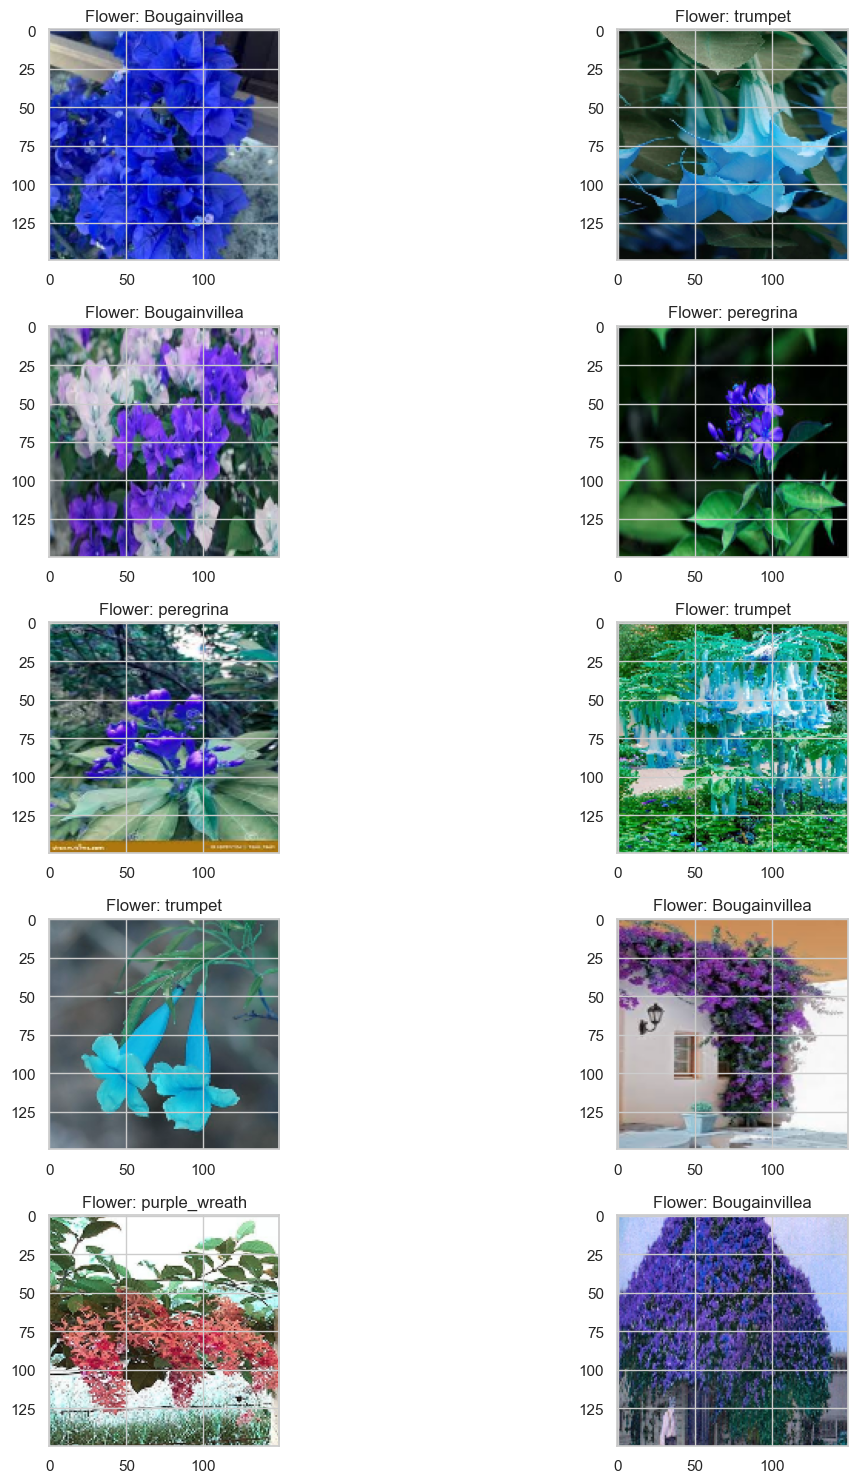

In [21]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [22]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [25]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [26]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
History = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.3351 - loss: 1.4114 - val_accuracy: 0.6667 - val_loss: 0.8405
Epoch 2/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6562 - loss: 0.8760

2024-04-15 09:46:37.014490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.6562 - loss: 0.4693 - val_accuracy: 0.5997 - val_loss: 1.0706
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6753 - loss: 0.8223 - val_accuracy: 0.7847 - val_loss: 0.5396
Epoch 4/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7969 - loss: 0.5873

2024-04-15 09:47:22.622551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.7969 - loss: 0.3146 - val_accuracy: 0.7990 - val_loss: 0.5718
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7954 - loss: 0.5203 - val_accuracy: 0.8565 - val_loss: 0.3957
Epoch 6/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8359 - loss: 0.3951

2024-04-15 09:48:07.621704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.8359 - loss: 0.2117 - val_accuracy: 0.8357 - val_loss: 0.4052
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8255 - loss: 0.4470 - val_accuracy: 0.7576 - val_loss: 0.6178
Epoch 8/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7656 - loss: 0.5820

2024-04-15 09:48:52.441492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.7656 - loss: 0.3118 - val_accuracy: 0.8581 - val_loss: 0.3969
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8695 - loss: 0.3835 - val_accuracy: 0.8676 - val_loss: 0.3315
Epoch 10/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8125 - loss: 0.4203

2024-04-15 09:49:38.063946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.8125 - loss: 0.2251 - val_accuracy: 0.8724 - val_loss: 0.3171
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8563 - loss: 0.3786 - val_accuracy: 0.8533 - val_loss: 0.3965
Epoch 12/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9070 - loss: 0.2744

2024-04-15 09:50:24.862579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.9070 - loss: 0.1470 - val_accuracy: 0.8437 - val_loss: 0.4384
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8821 - loss: 0.3404 - val_accuracy: 0.8309 - val_loss: 0.4351
Epoch 14/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8672 - loss: 0.3933

2024-04-15 09:51:14.862523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.8672 - loss: 0.2107 - val_accuracy: 0.8836 - val_loss: 0.3117
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8653 - loss: 0.3691 - val_accuracy: 0.8565 - val_loss: 0.3910
Epoch 16/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8594 - loss: 0.3274

2024-04-15 09:52:04.185227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.8594 - loss: 0.1754 - val_accuracy: 0.8549 - val_loss: 0.4010
Epoch 17/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8629 - loss: 0.3500 - val_accuracy: 0.8852 - val_loss: 0.2821
Epoch 18/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8906 - loss: 0.3034

2024-04-15 09:52:49.161252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.8906 - loss: 0.1626 - val_accuracy: 0.8804 - val_loss: 0.2953
Epoch 19/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8899 - loss: 0.2929 - val_accuracy: 0.9059 - val_loss: 0.2845
Epoch 20/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8594 - loss: 0.3499

2024-04-15 09:53:35.980977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.8594 - loss: 0.1874 - val_accuracy: 0.8533 - val_loss: 0.3666
Epoch 21/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8776 - loss: 0.3251 - val_accuracy: 0.8740 - val_loss: 0.3338
Epoch 22/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8828 - loss: 0.3065

2024-04-15 09:54:22.088704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.8828 - loss: 0.1642 - val_accuracy: 0.8628 - val_loss: 0.3872
Epoch 23/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9020 - loss: 0.2846 - val_accuracy: 0.9075 - val_loss: 0.2772
Epoch 24/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8516 - loss: 0.3838

2024-04-15 09:55:07.655856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.8516 - loss: 0.2056 - val_accuracy: 0.8979 - val_loss: 0.2789
Epoch 25/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8923 - loss: 0.2910 - val_accuracy: 0.9043 - val_loss: 0.2739
Epoch 26/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9141 - loss: 0.2745

2024-04-15 09:55:54.070917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.9141 - loss: 0.1471 - val_accuracy: 0.9107 - val_loss: 0.2467
Epoch 27/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8919 - loss: 0.2893 - val_accuracy: 0.8740 - val_loss: 0.3187
Epoch 28/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8516 - loss: 0.3983

2024-04-15 09:56:39.119520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.8516 - loss: 0.2134 - val_accuracy: 0.9091 - val_loss: 0.2479
Epoch 29/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8654 - loss: 0.3335 - val_accuracy: 0.8868 - val_loss: 0.3061
Epoch 30/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8984 - loss: 0.3150

2024-04-15 09:57:28.082065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.8984 - loss: 0.1688 - val_accuracy: 0.8915 - val_loss: 0.2828
Epoch 31/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8924 - loss: 0.2855 - val_accuracy: 0.9107 - val_loss: 0.2576
Epoch 32/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9453 - loss: 0.2132

2024-04-15 09:58:17.740411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.9453 - loss: 0.1142 - val_accuracy: 0.8979 - val_loss: 0.3118
Epoch 33/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9153 - loss: 0.2656 - val_accuracy: 0.8931 - val_loss: 0.2591
Epoch 34/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9062 - loss: 0.2418

2024-04-15 09:59:06.055944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.9062 - loss: 0.1295 - val_accuracy: 0.8963 - val_loss: 0.2713
Epoch 35/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9207 - loss: 0.2275 - val_accuracy: 0.9107 - val_loss: 0.2446
Epoch 36/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9453 - loss: 0.1988

2024-04-15 09:59:58.868369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.9453 - loss: 0.1065 - val_accuracy: 0.9075 - val_loss: 0.2597
Epoch 37/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9175 - loss: 0.2252 - val_accuracy: 0.9027 - val_loss: 0.2858
Epoch 38/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8984 - loss: 0.2619

2024-04-15 10:00:48.555046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.8984 - loss: 0.1403 - val_accuracy: 0.9043 - val_loss: 0.2717
Epoch 39/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9030 - loss: 0.2475 - val_accuracy: 0.9043 - val_loss: 0.2679
Epoch 40/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9453 - loss: 0.1625

2024-04-15 10:01:35.937423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.9453 - loss: 0.0870 - val_accuracy: 0.9011 - val_loss: 0.2809
Epoch 41/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9299 - loss: 0.2044 - val_accuracy: 0.9075 - val_loss: 0.2632
Epoch 42/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8672 - loss: 0.3856

2024-04-15 10:02:20.689439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.8672 - loss: 0.2066 - val_accuracy: 0.9059 - val_loss: 0.2586
Epoch 43/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9178 - loss: 0.2309 - val_accuracy: 0.8915 - val_loss: 0.2774
Epoch 44/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9141 - loss: 0.1825

2024-04-15 10:03:04.954724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.9141 - loss: 0.0978 - val_accuracy: 0.8724 - val_loss: 0.3053
Epoch 45/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9019 - loss: 0.2360 - val_accuracy: 0.9203 - val_loss: 0.2279
Epoch 46/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9219 - loss: 0.2281

2024-04-15 10:03:51.134128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.9219 - loss: 0.1222 - val_accuracy: 0.8900 - val_loss: 0.3022
Epoch 47/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9166 - loss: 0.2388 - val_accuracy: 0.9011 - val_loss: 0.2524
Epoch 48/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9375 - loss: 0.1685

2024-04-15 10:04:40.617412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.9375 - loss: 0.0902 - val_accuracy: 0.9011 - val_loss: 0.2696
Epoch 49/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9275 - loss: 0.2044 - val_accuracy: 0.9059 - val_loss: 0.2661
Epoch 50/50
 1/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9375 - loss: 0.1515

2024-04-15 10:05:24.597541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9375 - loss: 0.0812 - val_accuracy: 0.8565 - val_loss: 0.3713


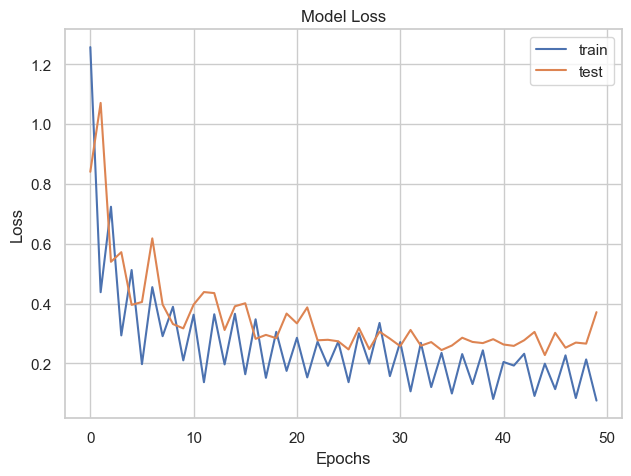

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

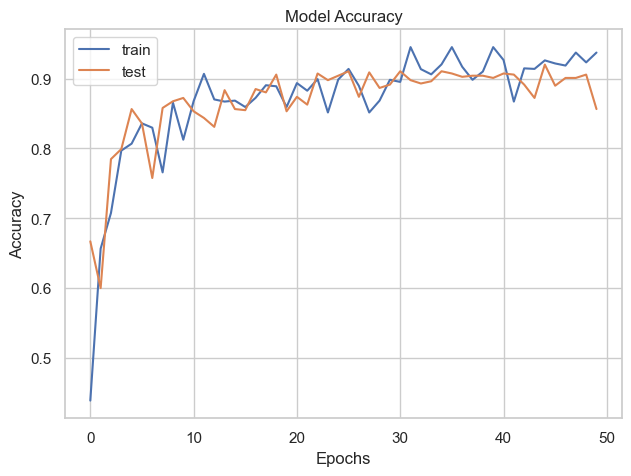

In [32]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

In [33]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step


In [34]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

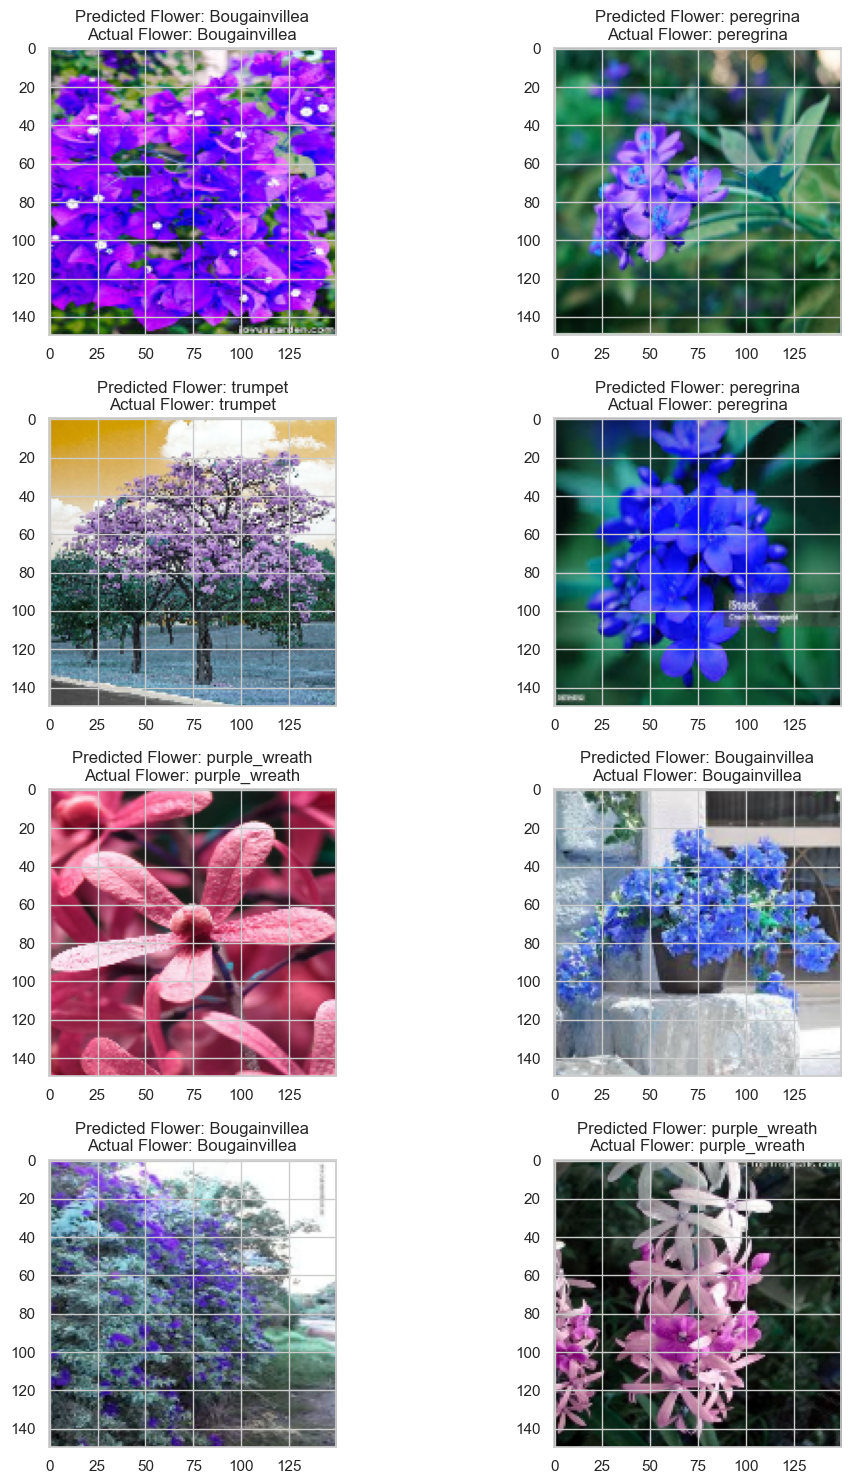

In [35]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        ax[i, j].set_title("Predicted Flower: " + str(le.inverse_transform([pred_digits[prop_class[count]]])[0]) +
                           "\nActual Flower: " + str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])[0]))
        plt.tight_layout()
        count += 1

plt.show()

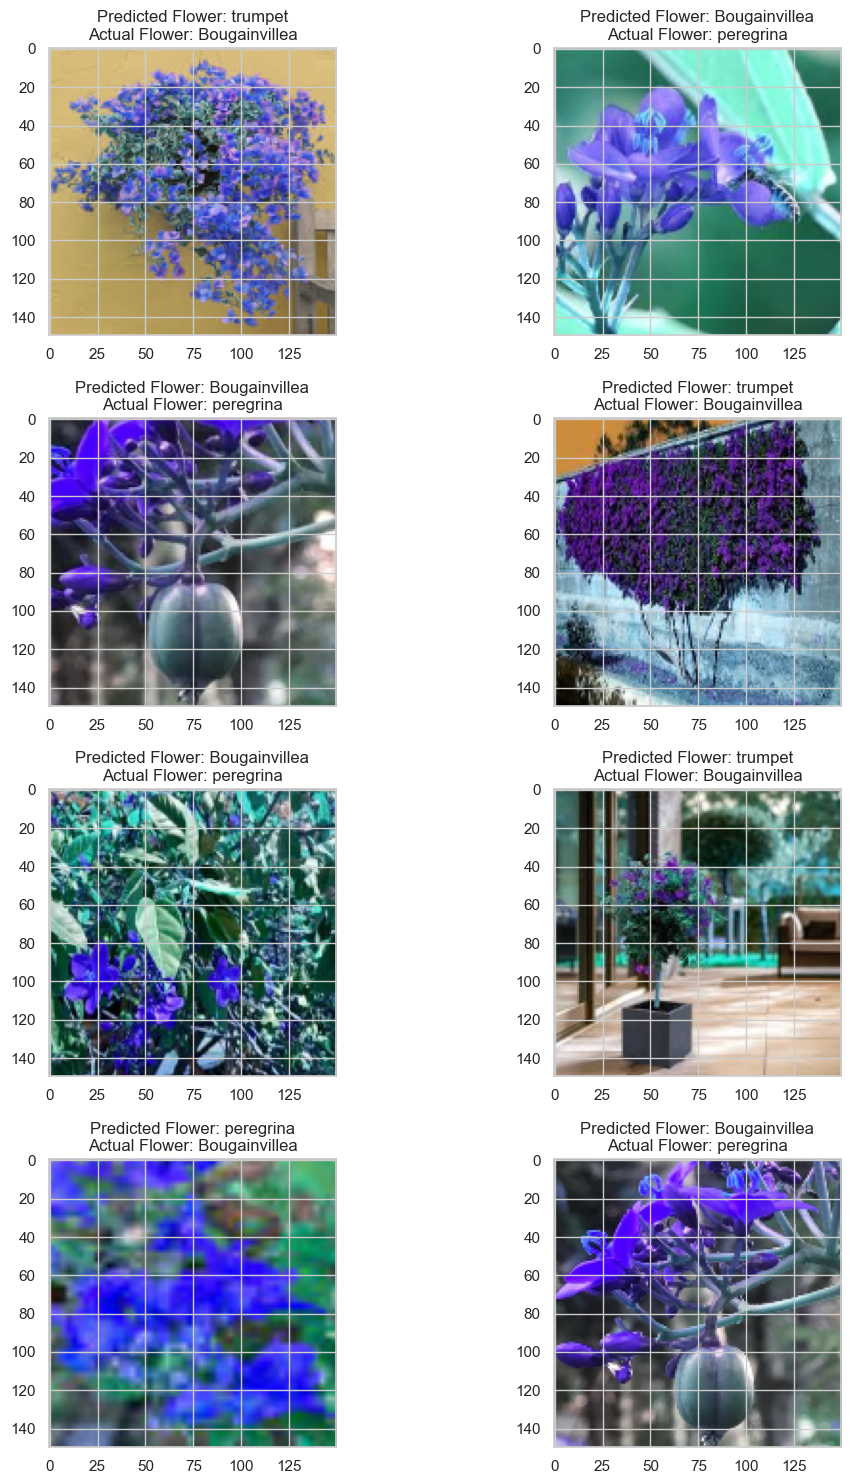

In [36]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        if count < len(mis_class):
            ax[i,j].imshow(x_test[mis_class[count]])
            predicted_flower = le.inverse_transform([pred_digits[mis_class[count]]])[0]
            actual_flower = le.inverse_transform([np.argmax(y_test[mis_class[count]])])[0]
            ax[i,j].set_title("Predicted Flower: " + predicted_flower + "\nActual Flower: " + actual_flower)
            plt.tight_layout()
            count+=1
plt.show()